In [1]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [5]:
using DifferentialEquations
using Plots
import .JuliaMBD

In [6]:
## MSD

function MSD(;M, D, k, g = 9.8)
    b = JuliaMBD.SubSystemBlock(:MSD)

    JuliaMBD.addparameter!(b, :M, M, Float64)
    JuliaMBD.addparameter!(b, :D, D, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :k, k, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :g, g, JuliaMBD.Auto)

    in1 = JuliaMBD.Inport(:in1, out=JuliaMBD.OutPort(:in1_out))
    JuliaMBD.add!(b, in1)

    out1 = JuliaMBD.Outport(:out1, in=JuliaMBD.InPort(:out1_in))
    JuliaMBD.add!(b, out1)

    constant1 = JuliaMBD.Constant(value = :(M*g), out=JuliaMBD.OutPort(:const1_out))
    JuliaMBD.add!(b, constant1)

    gain1 = JuliaMBD.Gain(K = :D, in=JuliaMBD.InPort(:g1_in), out=JuliaMBD.OutPort(:g1_out))
    JuliaMBD.add!(b, gain1)

    gain2 = JuliaMBD.Gain(K = :k, in=JuliaMBD.InPort(:g2_in), out=JuliaMBD.OutPort(:g2_out))
    JuliaMBD.add!(b, gain2)

    gain3 = JuliaMBD.Gain(K = :(1/M), in=JuliaMBD.InPort(:g3_in), out=JuliaMBD.OutPort(:g3_out))
    JuliaMBD.add!(b, gain3)

    int1 = JuliaMBD.Integrator(sin = JuliaMBD.OutPort(:int1sin), sout = JuliaMBD.OutPort(:int1sout))
    JuliaMBD.add!(b, int1)

    int2 = JuliaMBD.Integrator(initialcondition = :(M*g/k), sin = JuliaMBD.OutPort(:int2sin), sout = JuliaMBD.OutPort(:int2sout))
    JuliaMBD.add!(b, int2)

    sum1 = JuliaMBD.Add(signs=[:+, :+, :-, :-], out=JuliaMBD.OutPort(:sum1_out))
    JuliaMBD.add!(b, sum1)

    JuliaMBD.LineSignal(in1.env[:out], sum1.env[:in1])
    JuliaMBD.LineSignal(constant1.env[:out], sum1.env[:in2])
    JuliaMBD.LineSignal(gain1.env[:out], sum1.env[:in3])
    JuliaMBD.LineSignal(gain2.env[:out], sum1.env[:in4])
    JuliaMBD.LineSignal(sum1.env[:out], gain3.env[:in])

    JuliaMBD.LineSignal(gain3.env[:out], int1.env[:in])
    JuliaMBD.LineSignal(int1.env[:out], int2.env[:in])
    JuliaMBD.LineSignal(int1.env[:out], gain1.env[:in])

    JuliaMBD.LineSignal(int2.env[:out], gain2.env[:in])
    JuliaMBD.LineSignal(int2.env[:out], out1.env[:in])

    JuliaMBD.addscope!(b, :x, out1.env[:in])
    JuliaMBD.addscope!(b, :x2, gain3.env[:out])
    b
end

MSD (generic function with 1 method)

In [7]:
## test

function Test(;M, D, k, f, p_cycle, p_width)
    b = JuliaMBD.SubSystemBlock(:Test)

    JuliaMBD.addparameter!(b, :M, M, Float64)
    JuliaMBD.addparameter!(b, :D, D, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :k, k, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :f, f, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :p_cycle, p_cycle, JuliaMBD.Auto)
    JuliaMBD.addparameter!(b, :p_width, p_width, JuliaMBD.Auto)
    # JuliaMBD.addparameter!(b, :g, 9.8)

    msd = MSD(M=:M, D=:D, k=:k)
    JuliaMBD.add!(b, msd)

    pulse = JuliaMBD.PulseGenerator(amplitude=f, period=p_cycle, pulsewidth=p_width, phasedelay=10.0)
    # JuliaMBD.LineSignal(b.timeport, pulse.env[:__time__])
    JuliaMBD.add!(b, pulse)

    JuliaMBD.LineSignal(pulse.env[:out], msd.env[:in1])

    JuliaMBD.addscope!(b, :F, pulse.env[:out])
    b
end

Test (generic function with 1 method)

In [5]:
b = MSD(M = :M, D = :D, k = :k)
JuliaMBD.expr_sfunc(b)

MSD_sfunc (generic function with 1 method)

In [6]:
M = 10
D = 2
k = 3
MSD_sfunc(3,4,3)

(8.3, 3, 0)

In [8]:
b = Test(M=10, D=1, k=10, f=100, p_cycle=20, p_width=50)
JuliaMBD.expr_sfunc(b)
# Test_sfunc(1,2, M=10, D=10, k=10, f=100, p_cycle=20, p_width=50, time=10)

:(function Test_sfunc(int1sin, int2sin; M = (Float64)(10), D = 1, k = 10, f = 100, p_cycle = 20, p_width = 50, g = 9.8, time = 0)
      var"##332" = (M * g) / k
      var"##333" = (nothing, nothing)
      var"##352" = 20
      begin
          var"##347" = int2sin
          var"##348" = int2sin
      end
      begin
          var"##345" = int1sin
          var"##346" = int1sin
      end
      var"##319" = var"##346"
      var"##331" = var"##345"
      begin
          var"##355" = time
      end
      var"##350" = var"##355"
      var"##321" = D
      var"##320" = var"##321" * var"##319"
      begin
          var"##341" = var"##320"
      end
      var"##330" = (nothing, nothing)
      var"##318" = M * g
      int2sout = var"##331"
      begin
      end
      var"##353" = 50
      var"##327" = 1 / M
      var"##317" = var"##318"
      begin
          var"##340" = var"##317"
      end
      var"##336" = var"##340"
      var"##322" = var"##347"
      var"##354" = 10.0
      var"##351" = 10

In [8]:
b = MSD(M=10, D=10, k=10)
b = Test(M=10, D=10, k=10, f=10, p_cycle=20, p_width=50)
JuliaMBD.expr_sfunc(b)

:(function Test_sfunc(int1sin, int2sin; M = (Float64)(10), D = 10, k = 10, f = 10, p_cycle = 20, p_width = 50, g = 9.8, time = 0)
      begin
          var"##454" = int2sin
          var"##455" = int2sin
      end
      begin
          var"##462" = time
      end
      begin
          var"##452" = int1sin
          var"##453" = int1sin
      end
      var"##428" = D
      var"##459" = 20
      var"##423" = var"##455"
      out1 = var"##423"
      var"##460" = 50
      var"##434" = 1 / M
      var"##461" = 10.0
      var"##437" = (nothing, nothing)
      var"##429" = var"##454"
      var"##439" = (M * g) / k
      var"##431" = k
      var"##430" = var"##431" * var"##429"
      begin
          var"##449" = var"##430"
      end
      var"##438" = var"##452"
      var"##445" = var"##449"
      var"##440" = (nothing, nothing)
      int2sout = var"##438"
      begin
      end
      var"##457" = var"##462"
      var"##426" = var"##453"
      var"##427" = var"##428" * var"##426"
      begin
  

In [12]:
b = Test(M=10, D=10, k=10, f=10, p_cycle=20, p_width=50)

"Block(Test)"

In [13]:
eval(JuliaMBD.expr_sfunc(b))
eval(JuliaMBD.expr_ofunc(b))
eval(JuliaMBD.expr_ifunc(b))
eval(JuliaMBD.expr_pfunc(b))
m = JuliaMBD.ODEModel(
    b,
    eval(JuliaMBD.expr_odemodel_pfunc(b)),
    eval(JuliaMBD.expr_odemodel_ifunc(b)),
    eval(JuliaMBD.expr_odemodel_sfunc(b)),
    eval(JuliaMBD.expr_odemodel_ofunc(b))
);

  0.257494 seconds (742.33 k allocations: 40.098 MiB, 16.63% gc time, 99.06% compilation time)


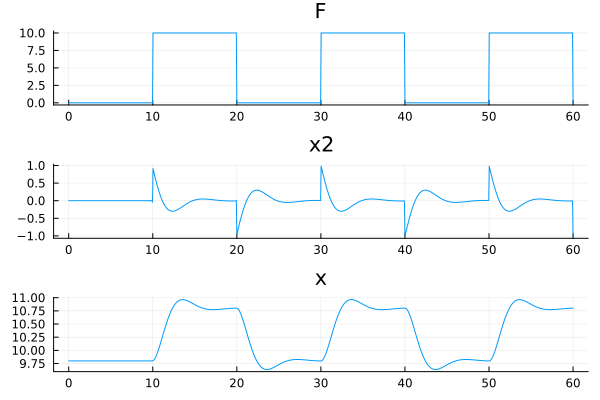

In [14]:
@time begin
    result = JuliaMBD.simulate(m, tspan=(0.0, 60.0))
    plot(result, layout=(3,1))
end